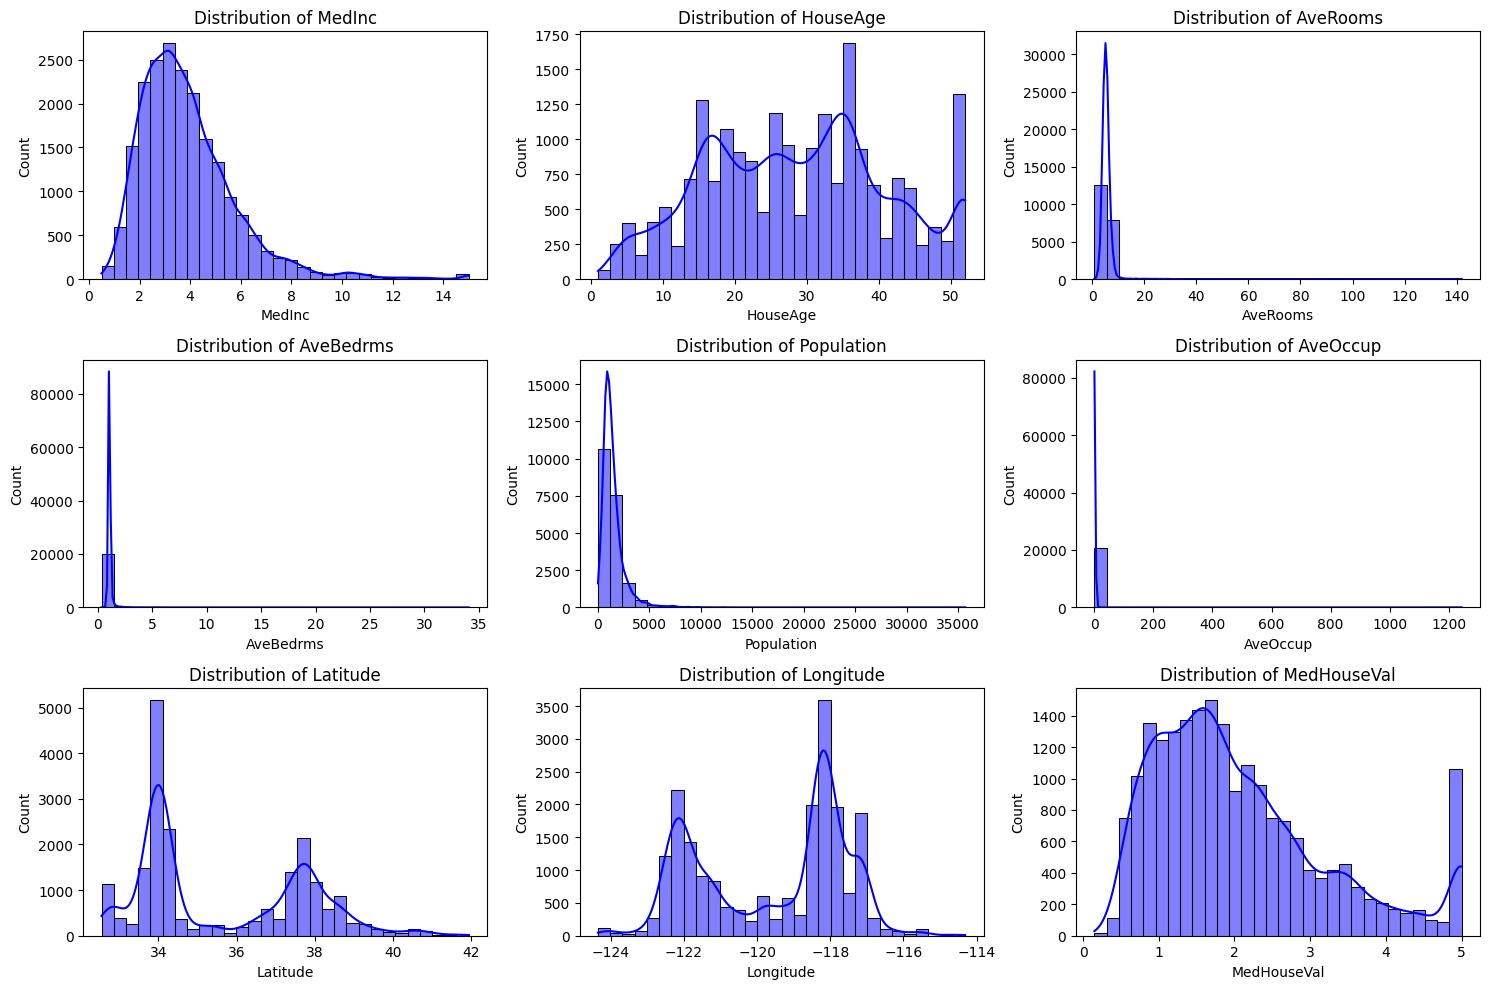

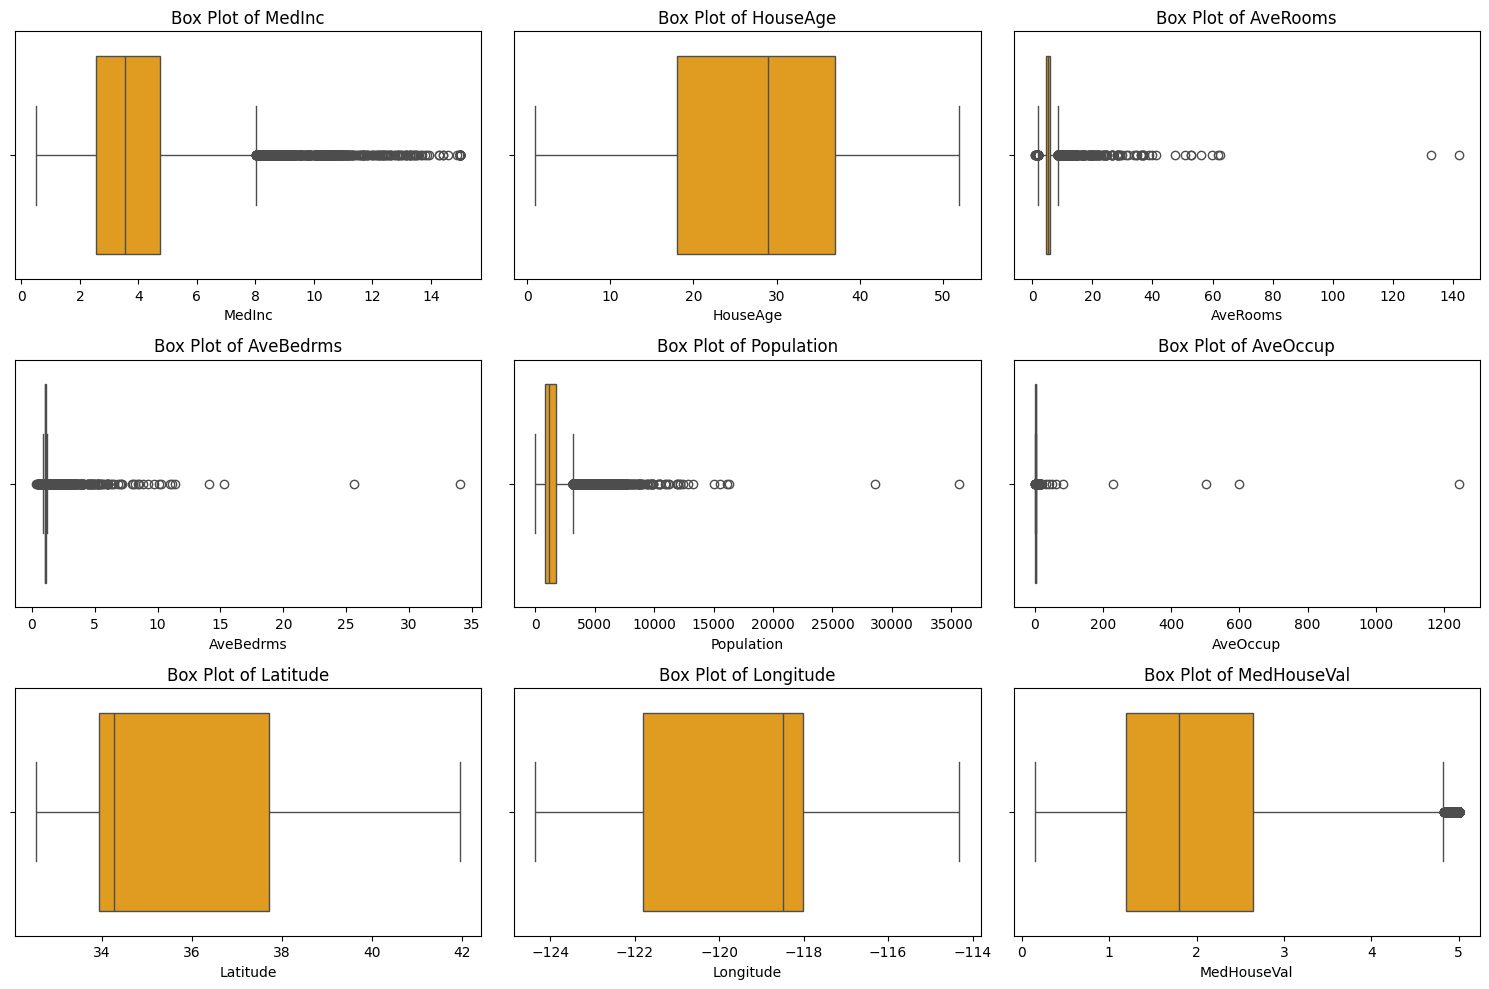

Outliers Detection:
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers

Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Lon

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing_df = data.frame

# Step 2: Create histograms for numerical features
numerical_features = housing_df.select_dtypes(include=[np.number]).columns

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(housing_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Step 3: Generate box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=housing_df[feature], color='orange')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Step 4: Identify outliers using the IQR method
print("Outliers Detection:")
outliers_summary = {}
for feature in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing_df[(housing_df[feature] < lower_bound) | (housing_df[feature] > upper_bound)]
    outliers_summary[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers")

# Optional: Print a summary of the dataset
print("\nDataset Summary:")
print(housing_df.describe())


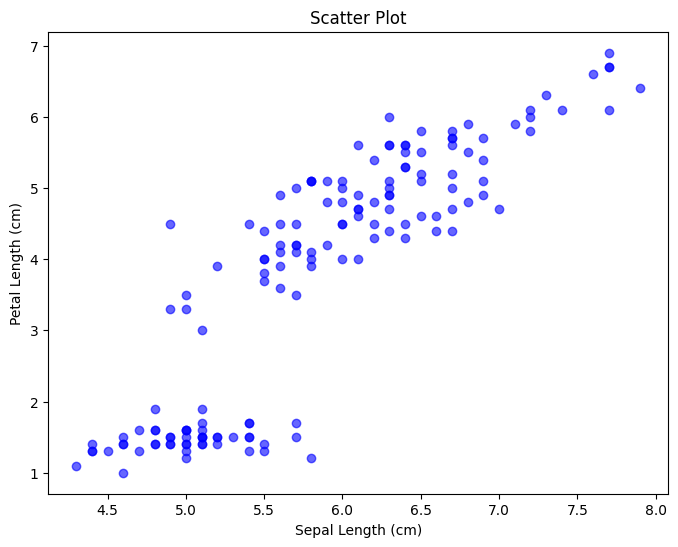

Pearson correlation coefficient is: 0.87

Covariance Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.8179

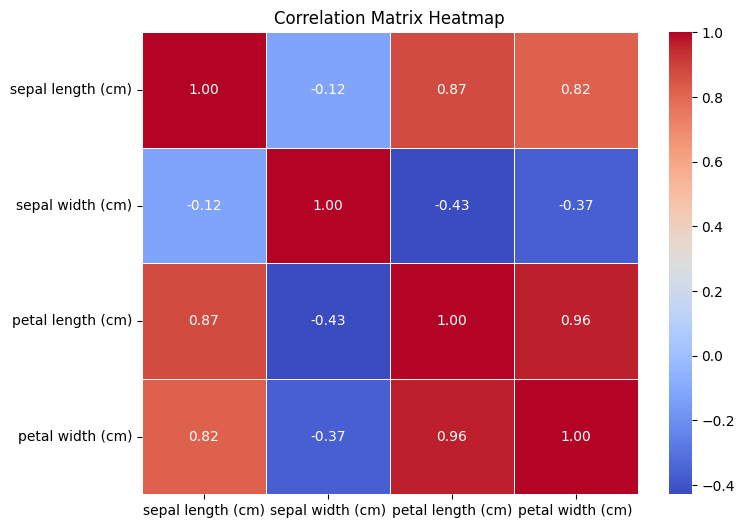

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
x = df['sepal length (cm)']
y = df['petal length (cm)']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()
corr = np.corrcoef(x, y)[0, 1]
print(f"Pearson correlation coefficient is: {corr:.2f}")
cov_mat = df.cov()
print("\nCovariance Matrix:")
print(cov_mat)
corr_mat = df.corr()
print("\nCorrelation Matrix:")
print(corr_mat)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9        

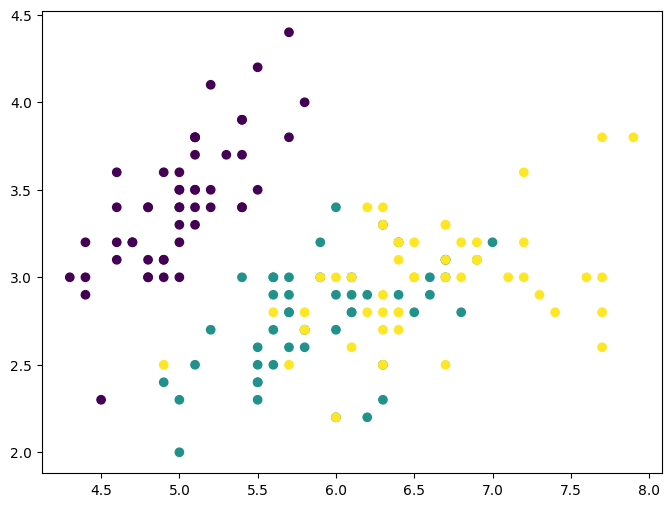

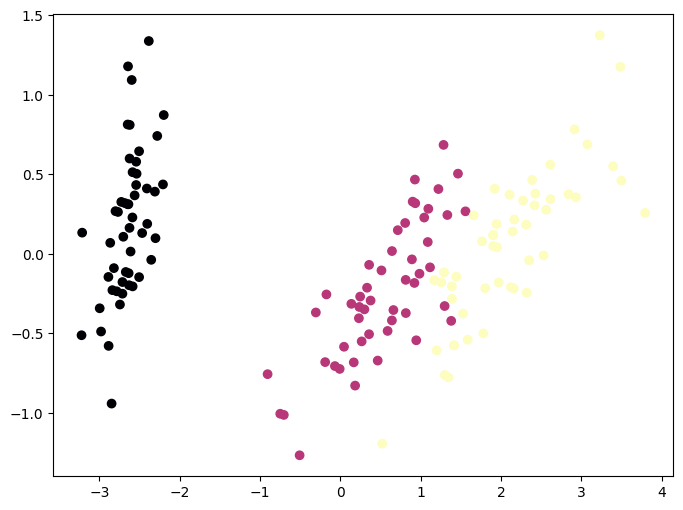

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_data.describe())
print(iris_data.head())
X = iris.data
y = iris.target
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='magma')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print(X[:5])
print(y [:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def knn_model(X_train, X_test, y_train, y_test, k, weighted=False):
    if weighted:
        model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    else:
        model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

k_values = [1, 3, 5]
results = {'k': [], 'Regular k-NN Accuracy': [], 'Regular k-NN F1 Score': [], 'Weighted k-NN Accuracy': [], 'Weighted k-NN F1 Score': []}

for k in k_values:
    reg_accuracy, reg_f1 = knn_model(X_train, X_test, y_train, y_test, k, weighted=False)
    weighted_accuracy, weighted_f1 = knn_model(X_train, X_test, y_train, y_test, k, weighted=True)
    results['k'].append(k)
    results['Regular k-NN Accuracy'].append(reg_accuracy)
    results['Regular k-NN F1 Score'].append(reg_f1)
    results['Weighted k-NN Accuracy'].append(weighted_accuracy)
    results['Weighted k-NN F1 Score'].append(weighted_f1)

results_df = pd.DataFrame(results)
print(results_df)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
   k  Regular k-NN Accuracy  Regular k-NN F1 Score  Weighted k-NN Accuracy  \
0  1                    1.0                    1.0                     1.0   
1  3                    1.0                    1.0                     1.0   
2  5                    1.0                    1.0                     1.0   

   Weighted k-NN F1 Score  
0                     1.0  
1                     1.0  
2                     1.0  


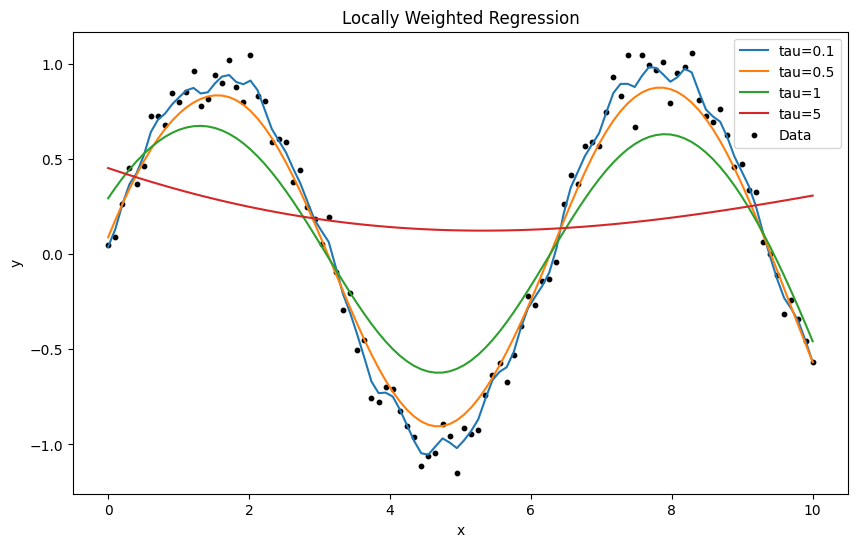

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

# Generate synthetic dataset
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)

# Locally Weighted Regression function
def locally_weighted_regression(x_train, y_train, x_test, tau):
    m = len(x_train)
    y_pred = np.zeros_like(x_test)
    for i, x0 in enumerate(x_test):
        weights = np.exp(-((x_train - x0) ** 2) / (2 * tau ** 2))
        W = np.diag(weights)
        X_b = np.c_[np.ones((m, 1)), x_train]  # Add bias term
        theta = inv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y_train)
        y_pred[i] = np.array([1, x0]) @ theta
    return y_pred

# Perform LWR for different tau values
tau_values = [0.1, 0.5, 1, 5]
plt.figure(figsize=(10, 6))
for tau in tau_values:
    y_pred = locally_weighted_regression(x, y, x, tau)
    plt.plot(x, y_pred, label=f'tau={tau}')

plt.scatter(x, y, color='black', s=10, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()

Demonstrating Linear Regression and Polynomial Regression



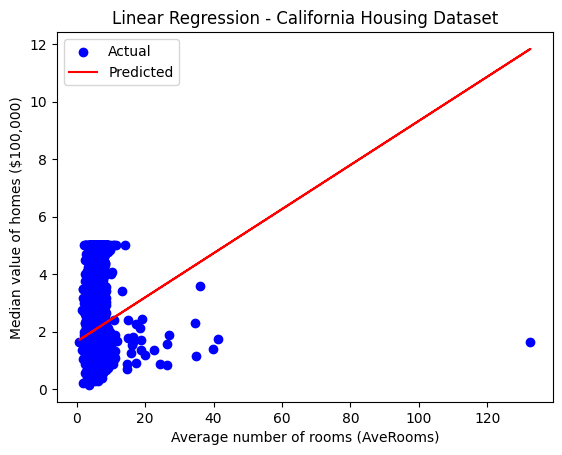

Linear Regression - California Housing Dataset
Mean Squared Error: 1.2923314440807299
R^2 Score: 0.013795337532284901


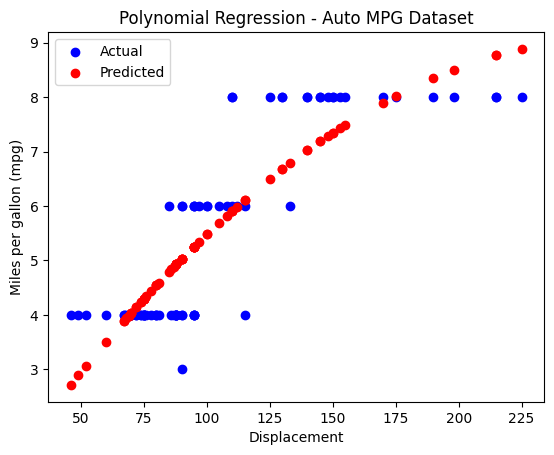

Polynomial Regression - Auto MPG Dataset
Mean Squared Error: 0.7431490557205861
R^2 Score: 0.7505650609469626


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_california():
    housing = fetch_california_housing(as_frame=True)
    X = housing.data[["AveRooms"]]
    y = housing.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Average number of rooms (AveRooms)")
    plt.ylabel("Median value of homes ($100,000)")
    plt.title("Linear Regression - California Housing Dataset")
    plt.legend()
    plt.show()

    print("Linear Regression - California Housing Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
    data = pd.read_csv(url, sep='\s+', names=column_names, na_values="?")
    data = data.dropna()

    X = data["displacement"].values.reshape(-1, 1)
    y = data["mpg"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
    poly_model.fit(X_train, y_train)

    y_pred = poly_model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.legend()
    plt.show()

    print("Polynomial Regression - Auto MPG Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


if __name__ == "__main__":
    print("Demonstrating Linear Regression and Polynomial Regression\n")
    linear_regression_california()
    polynomial_regression_auto_mpg()

Accuracy: 66.43%
Precision: 64.71%
Recall: 52.38%
F1-Score: 57.89%


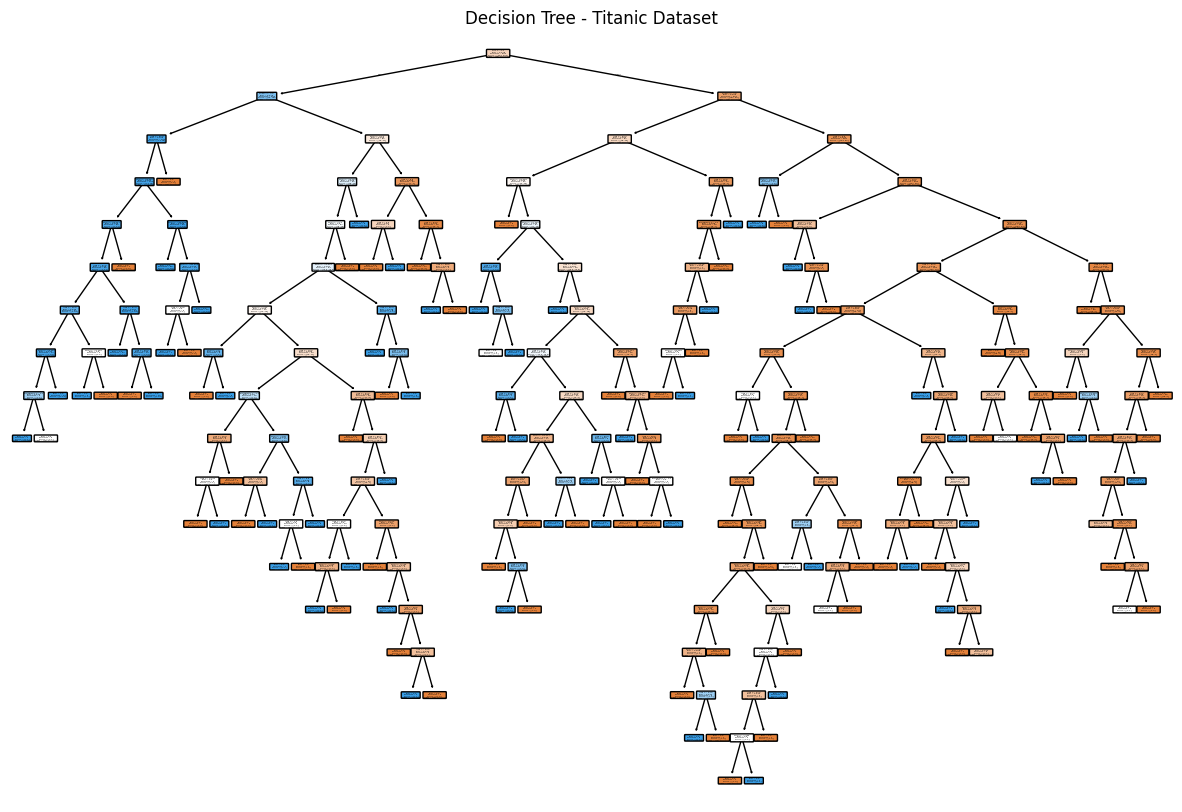

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset from a URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Drop rows with missing values in the specified columns
titanic_data = titanic_data.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'])

# Encode categorical features
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Define features (X) and target (y)
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree - Titanic Dataset")
plt.show()

Accuracy of Naive Bayes classifier: 100.00%


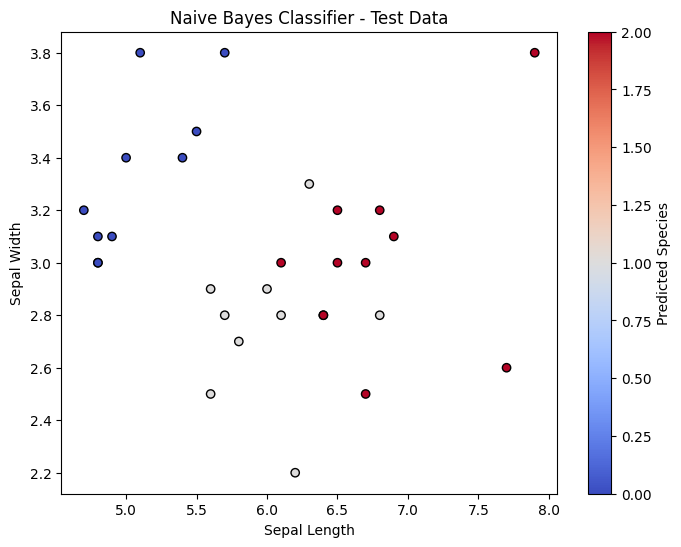

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naive Bayes classifier: {accuracy * 100:.2f}%')
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolor='k')
plt.title('Naive Bayes Classifier - Test Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Predicted Species')
plt.show()

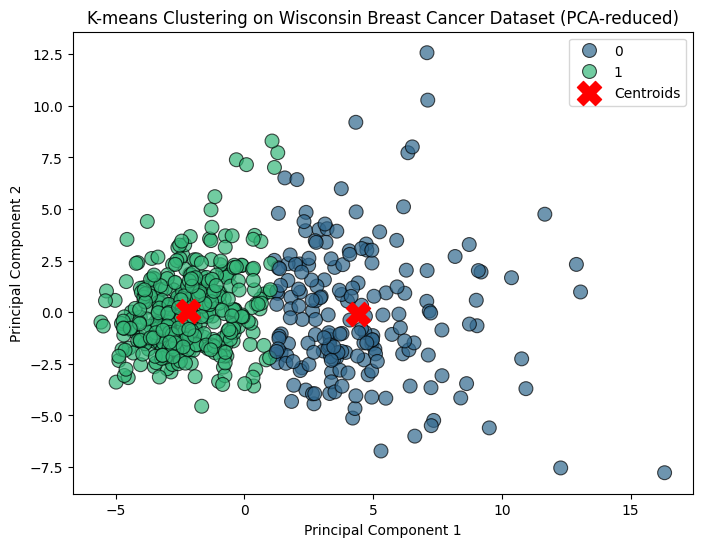

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.7, edgecolor='k')
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Wisconsin Breast Cancer Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()